# ChurnSage: Customer Retention Intelligence

Customer churn is one of the biggest challenges faced by businesses today. Losing customers directly impacts revenue and long-term growth. This project leverages data-driven insights and machine learning to predict and prevent customer churn effectively.

With ChurnSage, we aim to uncover patterns that signal churn and empower businesses to take strategic actions for improved customer retention.


## 2. Business Understanding

Customer churn — the process where customers discontinue using a company's product or service — presents a significant challenge for businesses, especially in competitive and subscription-based industries. It not only impacts revenue, but also increases the cost of customer acquisition and reduces long-term profitability.

In this project, I aim to build a data-driven framework that enables early identification of customers likely to churn. My goal is to empower decision-makers with predictive insights that inform timely interventions, customer retention strategies, and improved service personalization.

### Problem Statement
Many businesses lack the analytical infrastructure to anticipate churn before it happens. Without accurate forecasting, retention efforts are reactive rather than proactive. This leads to avoidable customer losses and missed opportunities for engagement.

### Project Objectives
Through this analysis and modeling process, I aim to:

- Identify key patterns and factors that influence customer churn.
- Develop a predictive machine learning model capable of flagging high-risk customers.
- Translate model outcomes into actionable recommendations for business teams.
- Demonstrate end-to-end capability in solving a real-world business problem using data science.

### Key Business Questions
This project aims to answer the following critical questions:

- What behavioral, demographic, or transactional factors contribute to customer churn?
- Can I develop a reliable machine learning model to predict churn before it happens?
- What strategies or business actions can be informed by these predictive insights?

By the end of this project, I intend to showcase a complete workflow — from problem understanding to deployment-ready solutions — while aligning technical outputs with strategic business goals.


## 3. Data Understanding

In this section, I begin by loading the dataset and conducting an initial exploration to understand its structure, data types, and general characteristics.

This step is critical for identifying potential issues such as missing values, data imbalances, or irregularities that may affect model performance later.

The dataset used in this project is a publicly available churn dataset from [BigML](https://bigml.com), which simulates customer data for a telecom company.

The dataset is stored in the `data/` folder and consists of behavioral and demographic attributes such as `account length`, `voice mail plan`, `international plan`, `customer service calls`, and whether or not the customer has churned.


### Load and Preview the Data

In [2]:
# Import essential libraries
import pandas as pd

# Load the dataset
file_path = '../data/bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

## 4. Data Preparation

Before conducting exploratory analysis and building predictive models, it is important to ensure the dataset is clean, consistent, and in a usable format.

In this section, I aim to:

- Check for and handle missing or inconsistent data.
- Convert data types where necessary.
- Encode categorical variables appropriately.
- Perform any basic feature engineering or transformations required for modeling.


## 4.1 Check for Missing Values

In [4]:
# Check for missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values detected:\n", missing)

✅ No missing values found in the dataset.


## 4.2 Check and Fix Data Types 

In [5]:
# 4.2 Check and Fix Data Types
# Display data types of all columns
df.dtypes


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

## 4.3 Identify Categorical Columns

In [6]:
# 4.3 Identify Categorical Columns
# List of categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['state', 'phone number', 'international plan', 'voice mail plan']


## 4.4 Encode Categorical Columns

In [7]:
# 4.4 Encode Categorical Columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


## 4.5 Confirm Final Dataset

In [8]:
# Check shape and structure of cleaned data
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Columns: 3401 entries, account length to voice mail plan_yes
dtypes: bool(1), float64(8), int64(8), uint8(3384)
memory usage: 11.2 MB


##  EDA and Statistics
**We want to uncover patterns, trends, and relationships to better understand customer churn. Some guiding questions:**

- 1.Which features are most associated with churn?

- 2.Do customers with international plans churn more?

- 3.Does the number of customer service calls relate to churn?

- 4.How does usage (minutes, charges) differ between churners and non-churners?

- 5.Are there any standout states with higher churn rates?

### Importing Libraries

In [9]:
# 5.0 Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default theme for seaborn
sns.set(style="whitegrid")


### 5.1 Churn Distribution

Before analyzing features in relation to churn, let's understand the overall distribution of churned vs non-churned customers. This tells us whether we’re dealing with class imbalance.


📊 Churn Rate: 14.49%


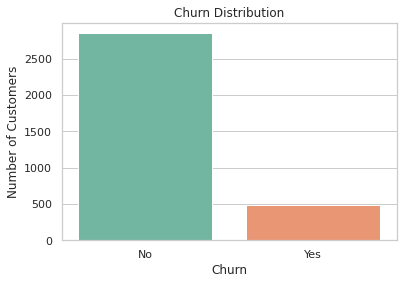

In [10]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['No', 'Yes'])

# Show churn rate
churn_rate = df['churn'].mean()
print(f"📊 Churn Rate: {churn_rate:.2%}")
plt.show()


### 5.1 Churn Distribution – Interpretation

The bar chart above visualizes the distribution of customers who have churned (left the service) versus those who have remained subscribed.

#### Key Observations

- **Most customers did not churn**  
  The chart shows that a large majority of the customers fall under the "No" category, meaning they did not leave the company. This is represented by the much taller bar on the left.

- **Only a small portion churned**  
  A significantly smaller number of customers fall under the "Yes" category. These are the customers who have churned and are represented by the shorter bar on the right.

#### Why This Matters

- **Class Imbalance**  
  This imbalance between churned and non-churned customers is critical to highlight. When training machine learning models, class imbalance can lead to a situation where the model favors the majority class ("No churn") and performs poorly at detecting churned customers. This will need to be addressed later in the modeling phase through techniques such as resampling or adjusting class weights.

- **Business Implications**  
  While the proportion of churned customers appears relatively small, each lost customer can represent a financial loss and potential dissatisfaction with the service. Understanding the causes of churn is essential to improving customer satisfaction and long-term retention.

#### Next Steps

In the next steps, I will explore how different variables (such as international plan, customer service calls, and usage behavior) relate to churn. This will help build a foundation for predictive modeling and inform actionable business strategies to reduce churn.


### 5.2 Churn Rate by International Plan

**Goal:**  
Explore whether customers who have subscribed to the **International Plan** are more likely to churn than those who haven’t.

To analyze this, I will:

- Group the dataset by `international plan` and `churn` status.
- Count the number of customers in each group.
- Normalize the values to show proportions.
- Visualize the results in a stacked bar chart to compare churn behavior for customers **with** and **without** an international plan.


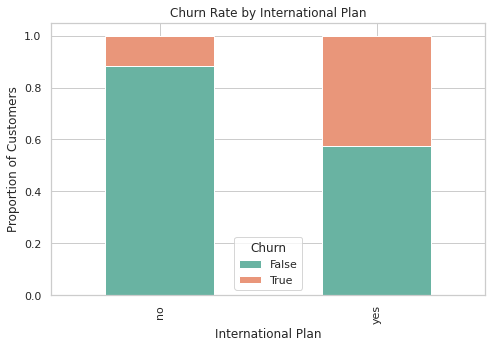

In [11]:
# 5.2 Churn Rate by International Plan
int_plan_churn = df.groupby(['international plan', 'churn']).size().unstack()

# Normalize by row to get percentages
int_plan_churn_percent = int_plan_churn.div(int_plan_churn.sum(axis=1), axis=0)

# Plot
int_plan_churn_percent.plot(kind='bar', stacked=True, figsize=(7,5), color=['#69b3a2', '#e9967a'])
plt.title("Churn Rate by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

### 5.2 Churn Rate by International Plan - Interpretation

This bar chart compares the proportion of customers who churned based on whether they were subscribed to the **International Plan**.

**Key Insights:**

- **Customers without an International Plan (left bar)**: The vast majority did **not churn**. A very small portion of this group ended their service.
- **Customers with an International Plan (right bar)**: A **much higher proportion churned** compared to those without the plan.

**Conclusion:**

Having an International Plan appears to be **strongly associated with a higher likelihood of churn**. This could suggest that customers using international services are less satisfied or have higher expectations that aren't being met.

This is an important signal for the business—it may be worth investigating the International Plan’s pricing, service quality, or customer support experience.


## 5.3 Customer Service Calls and Churn

**Objective:** Investigate whether the number of calls a customer makes to customer service is related to their likelihood of churning.

To do this, we will:

- Group customers based on the number of customer service calls.
- Calculate the churn rate for each group.
- Visualize the relationship between customer service interactions and churn behavior.

This will help us determine if frequent customer service interactions are a warning sign of dissatisfaction leading to churn.


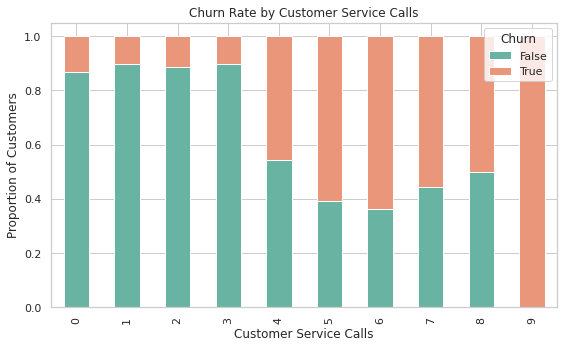

In [12]:
# Group data by number of customer service calls and churn
cs_calls_churn = df.groupby(['customer service calls', 'churn']).size().unstack()

# Normalize to get proportions
cs_calls_churn_percent = cs_calls_churn.div(cs_calls_churn.sum(axis=1), axis=0)

# Plot
cs_calls_churn_percent.plot(kind='bar', stacked=True, figsize=(8,5), color=['#69b3a2', '#e9967a'])
plt.title("Churn Rate by Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


## 5.3 Interpretation: Churn Rate by Customer Service Calls

This stacked bar chart shows how the likelihood of a customer churning varies depending on the number of times they contacted customer service.

### Key Observations

- **Low Churn with Few Calls:**  
  Customers who made **0 to 3 customer service calls** have a **very low churn rate**. Most of them are retained (green portion), indicating satisfaction or fewer issues.

- **Churn Rises After 3 Calls:**  
  Starting from **4 calls and above**, the churn rate begins to increase significantly.  
  By **5 or more calls**, more customers are churning (orange portion becomes dominant).

- **High Churn Beyond 5 Calls:**  
  At **6 or more calls**, the churn rate is very high — in some cases, **more than half** of the customers who contacted support this many times ended up churning.

### Interpretation

This trend strongly suggests a **relationship between customer dissatisfaction and churn**:
- Frequent contact with customer service likely signals unresolved problems or frustration.
- When issues aren't resolved promptly or effectively, customers are more likely to leave.

### Implication for the Business

- The company should **analyze customer service interactions closely**, especially for those who call multiple times.
- Taking **proactive steps** to resolve issues quickly for customers who call **more than 3 times** might significantly reduce churn.


## 5.4 Churn vs Total Day Minutes

### Objective:
Determine if higher usage during the day (in terms of total minutes) has any relation to customer churn.


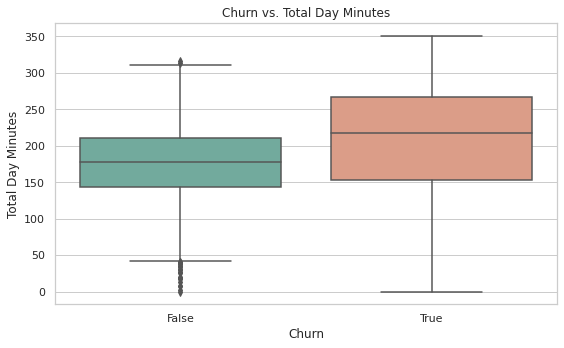

In [13]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.tight_layout()
plt.show()

## Interpretation: Churn vs Total Day Minutes

This boxplot compares the distribution of total day minutes used by customers who churned versus those who did not.

###  Key Observations

- **Higher Usage Among Churned Customers**:
  - Customers who churned tend to have higher total day minutes compared to those who stayed.
  - The median (middle line in the box) for churned customers is visibly higher.

- **Wider Spread in Churned Group**:
  - The churned group shows more variability, with some customers using significantly more minutes than the average.

- **Potential Outliers**:
  - There are a few extreme outliers among the churned group, indicating very high usage for a small subset of customers.

###  Interpretation

This pattern suggests a correlation between **higher daytime usage** and **likelihood of churn**:

- Heavy users may have **higher expectations** or are more likely to experience **network or billing issues**, leading to dissatisfaction.
- Alternatively, the pricing model might not favor high-usage customers, prompting them to switch providers.

###  Implication for the Business

- Analyze the experience of high-usage customers — Are they facing service degradation? Are they unhappy with pricing?
- Consider **loyalty programs or better plans** for heavy users to prevent them from churning.
- Use this insight to **segment customers by usage** and apply **targeted retention strategies**.


## 5.5 Churn vs Total Night Minutes

### Objective:
Evaluate whether there’s any noticeable relationship between night-time call minutes and customer churn.

To assess this, we will:

- Visualize the distribution of total night minutes for churned vs non-churned customers using a boxplot.
- Examine whether customers who churned tend to have higher or lower night-time call durations.
- Analyze any observable patterns that could guide business strategy for retention.


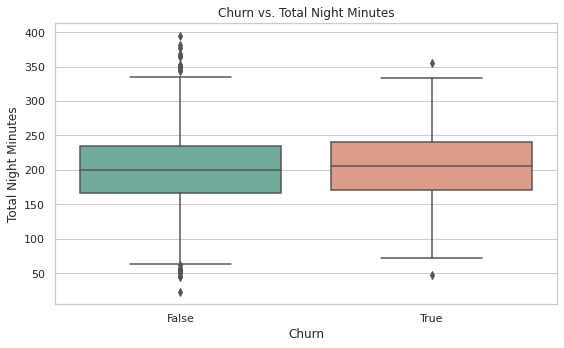

In [14]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total night minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Night Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')
plt.tight_layout()
plt.show()


##  Churn vs. Total Night Minutes (Boxplot Interpretation)

This boxplot compares the distribution of **Total Night Minutes** between customers who **churned** (`True`) and those who **did not churn** (`False`).

### Boxplot Summary

| Metric                  | Churn = False     | Churn = True      |
|-------------------------|-------------------|--------------------|
| **Median**              | ~200 minutes      | ~210 minutes       |
| **IQR (Spread)**        | Wider             | Narrower           |
| **Range**               | ~30 to ~340+ mins | ~45 to ~340+ mins  |
| **Outliers**            | Many high outliers| Fewer, but present |
| **Symmetry**            | Slight skew       | Fairly symmetric   |

###  Key Insights

-  **Higher Median for Churners**: Customers who churned had a slightly **higher median night usage**, suggesting they used night minutes more than non-churners.
-  **Similar Overall Ranges**: Both groups had similar minimum and maximum values, but the internal spread of values differed.
-  **Outliers**:
  - Non-churners had **more extreme values** above 300 mins.
  - Churners had **fewer but notable outliers**.

###  Interpretation

- High night usage **alone does not strongly predict churn**, but might contribute to it when combined with other factors.
- The difference in spread indicates **different behavior patterns** between churners and non-churners.

###  Business Implication

Understanding night-time call behavior can support:
- Creating **targeted packages** for high-usage night callers.
- **Retaining potential churners** with personalized offers or better night-time service experience.


## 5.6 Churn vs Total Evening Minutes

### Objective
Investigate whether there is a noticeable difference in evening call usage (in minutes) between customers who churn and those who remain subscribed.

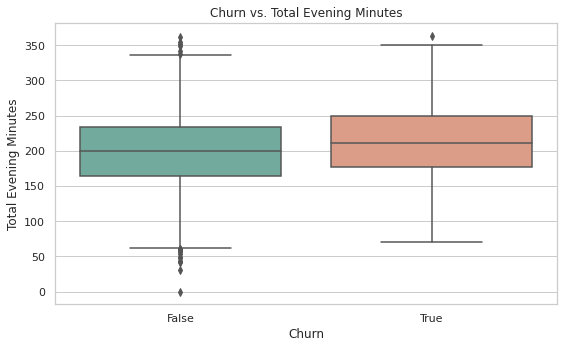

In [15]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total eve minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Evening Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.tight_layout()
plt.show()


### Interpretation: Churn vs Total Evening Minutes

This boxplot compares the distribution of total evening minutes for churned versus non-churned customers.

#### Key Observations

**Higher Usage Among Churners:**
- The median value for customers who churned is slightly higher than those who didn’t.
- This indicates that customers who churn may use evening minutes more.

**Spread and Outliers:**
- The churned group has a more compact IQR (interquartile range), suggesting slightly less variability within the middle 50%.
- Non-churned customers have a wider range, with a few high outliers beyond 300 minutes.

#### Interpretation

Evening usage alone doesn’t appear to be a strong indicator of churn but may still be a contributing factor.
- Higher usage could reflect customer reliance on service during evening hours, potentially increasing sensitivity to service quality or cost.

#### Business Implications

- Consider evaluating if evening heavy users are experiencing issues such as dropped calls or billing confusion.
- Offer incentives or tailored plans for high-evening users to improve satisfaction and reduce churn.


## 5.7 Churn vs Total Night Minutes

### Objective  
Investigate whether there is a significant difference in night call usage (in minutes) between customers who churned and those who remained subscribed.


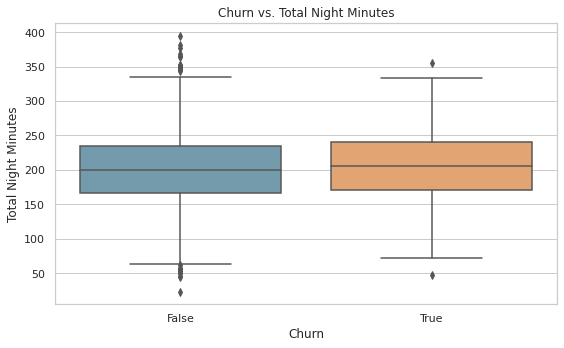

In [16]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total night minutes', data=df, palette=['#6a9fb5', '#f4a261'])
plt.title('Churn vs. Total Night Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')
plt.tight_layout()
plt.show()


### Interpretation: Churn vs Total Night Minutes

This boxplot compares the distribution of total night minutes for churned and non-churned customers.

####  Key Observations

- **Similar Medians**: The median night minutes used is nearly identical for both groups, indicating that night-time usage does not strongly differentiate churn behavior.
- **Slightly Wider Spread for Non-Churners**: Non-churned customers show slightly more variation, but the overall distribution is quite similar across groups.
- **Fewer Outliers**: There are fewer extreme outliers, suggesting night usage is more consistent across users.

####  Interpretation

Night call usage does not appear to have a strong influence on churn. Both churned and non-churned customers tend to use similar amounts of night minutes.

####  Business Implications

- Resources may be better focused on other time periods (e.g., day or evening) where usage differences are more pronounced.
- However, it's still important to ensure quality night-time service, especially for users who rely on off-peak hours.


## 5.8 Churn vs Total International Minutes

###  Objective

Investigate whether customers who churned tend to spend more time on international calls compared to those who remain subscribed.


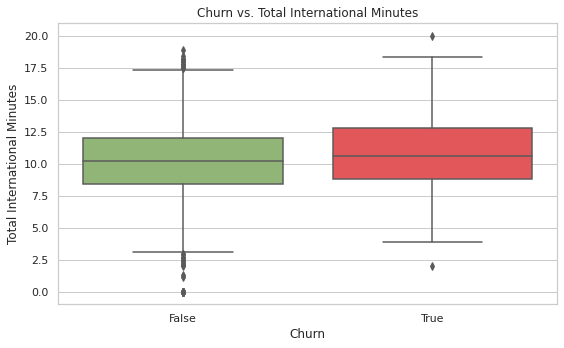

In [17]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total intl minutes', data=df, palette=['#90be6d', '#f94144'])
plt.title('Churn vs. Total International Minutes')
plt.xlabel('Churn')
plt.ylabel('Total International Minutes')
plt.tight_layout()
plt.show()


## 5.8 Churn vs Total International Minutes

###  Interpretation: Churn vs Total International Minutes

This boxplot compares the distribution of international call minutes for churned versus non-churned customers.

---

###  Key Observations

- **Higher International Usage Among Churners**  
  The median international minutes for churned customers is visibly higher than that of non-churned customers.  
  This suggests that customers who make more international calls may be more likely to churn.

- **Outliers and Distribution**  
  Both churned and non-churned groups show a relatively tight interquartile range (IQR), but churned customers have more visible outliers above 20 minutes, which may reflect a smaller group of heavy users.

---

### Interpretation

Higher international usage may contribute to churn, possibly due to:

- Higher international call charges leading to customer dissatisfaction  
- Expectation mismatch in international call quality or costs  
- Lack of competitive international calling plans

---

### Business Implications

- Consider introducing or promoting international calling bundles for heavy users.
- Identify and proactively engage international callers with loyalty programs or feedback surveys.
- Monitor complaints or issues related to international calls as early churn signals.


## 5.9 Churn vs Customer Service Calls (Categorical)

###  Objective

Investigate the relationship between the number of customer service calls and churn, with a focus on understanding if increased customer service interactions correlate with higher churn rates.


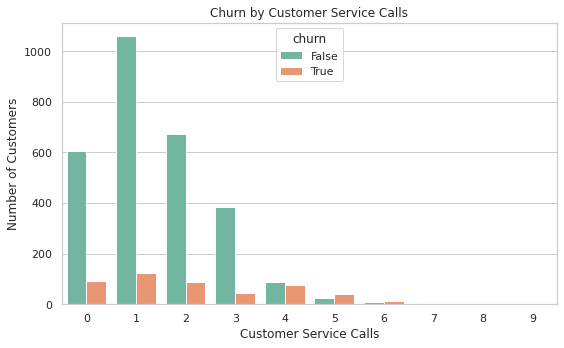

In [18]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='customer service calls', hue='churn', data=df, palette='Set2')
plt.title('Churn by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Interpretation: Churn vs Customer Service Calls (Categorical)

This count plot visualizes the number of customer service calls made by customers and how it relates to churn.

####  Key Observations

- **Higher Churn with More Calls**:  
  Customers who made 4 or more customer service calls are significantly more likely to churn.

- **Majority Didn't Call Much**:  
  Most customers, both churned and non-churned, made fewer than 3 calls.

- **Churn Rate Spikes After 3 Calls**:  
  The churn rate sharply increases for customers who contacted customer service frequently.

####  Interpretation

Frequent interactions with customer service may indicate dissatisfaction or unresolved issues. This group is at higher risk of leaving.

####  Business Implications

- Identify and flag customers who call 3+ times as **churn risks**.
- Implement a **priority resolution system** for repeat callers to enhance satisfaction.
- Regularly audit **customer service effectiveness** to reduce churn triggers.


## 5.10 Churn vs International Plan

###  Objective

Examine whether having an international calling plan affects the likelihood of churn. This analysis seeks to determine if customers with international plans are more likely to leave than those without.


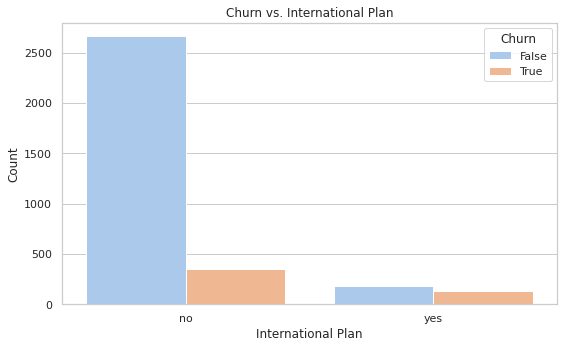

In [19]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='international plan', hue='churn', data=df, palette='pastel')
plt.title('Churn vs. International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### Interpretation: Churn vs International Plan

This count plot compares the churn distribution between customers with and without an international calling plan.

#### Key Observations

- **Higher Churn Rate Among International Plan Users**:  
  A significantly higher proportion of churned customers had an international plan compared to those who did not.

- **Majority Without Plan**:  
  Most customers, regardless of churn status, do not subscribe to the international plan. However, among those who do, churn is noticeably more frequent.

#### Interpretation

- Customers with international plans are more likely to churn.  
  This could be due to dissatisfaction with international call rates, poor service quality during international calls, or billing issues.

#### Business Implications

- **Service Review**:  
  Investigate the quality and pricing of the international calling service. Identify any recurring complaints from churned users with the plan.

- **Customer Feedback Loop**:  
  Reach out to current international plan users to gather feedback and proactively address concerns.

- **Targeted Retention Offers**:  
  Offer incentives, discounts, or upgraded service packages to international plan users at risk of churn.



## 6. Statistics

### Objective

To perform statistical analysis on the dataset to determine whether the differences observed in earlier visualizations (e.g., churn vs. total minutes, service plans, etc.) are statistically significant. This helps to validate whether patterns are likely due to chance or represent meaningful relationships.


## 6.1 Descriptive Statistics by Churn

###  Objective

To summarize and compare key statistics (mean, median, standard deviation, etc.) between customers who churned and those who didn’t, across relevant features. This provides a clearer picture of behavioral or usage differences.


In [20]:
# Group by churn and calculate descriptive statistics
churn_stats = df.groupby('churn').describe()

# Display summary
churn_stats.T  # Transpose for better readability

churn                               False       True 
account length         count  2850.000000  483.000000
                       mean    100.793684  102.664596
                       std      39.882350   39.467820
                       min       1.000000    1.000000
                       25%      73.000000   76.000000
...                                   ...         ...
customer service calls min       0.000000    0.000000
                       25%       1.000000    1.000000
                       50%       1.000000    2.000000
                       75%       2.000000    4.000000
                       max       8.000000    9.000000

[128 rows x 2 columns]

### Interpretation: Descriptive Statistics by Churn

This analysis provides summary statistics for numerical features, grouped by customer churn status.

#### Key Observations:

- **Account Length:**
  - Mean account length is slightly higher for churned customers (`102.7`) compared to non-churned (`100.8`).
  - Standard deviations are similar, indicating comparable spread.
  - Not a strong differentiator on its own.

- **Customer Service Calls:**
  - Median (`50%`) number of calls for churned customers is **2**, compared to **1** for non-churned.
  - The upper quartile (`75%`) is **4** for churned vs. **2** for non-churned, and the maximum is slightly higher (`9` vs. `8`).
  - Indicates that churned customers tend to contact customer service more often.

#### Implication:

- Features like **customer service calls** show clearer distinctions between churned and non-churned groups and may serve as a useful predictor in churn modeling.
- Other variables like account length show only minor differences and might have less predictive power individually.

This analysis provides summary statistics for numerical features, grouped by customer churn status.


## 6.2 Independent T-Test: Total Night Minutes

🎯 **Objective:**  
To test whether the average total night minutes differ significantly between churned and non-churned customers using an **Independent Samples T-Test**.

This statistical test helps determine whether the observed difference in means (if any) is statistically significant or likely due to random chance.

---

📊 **Hypotheses:**

- **Null Hypothesis (H₀):**  
  There is **no significant difference** in total night minutes between churned and non-churned customers.

- **Alternative Hypothesis (H₁):**  
  There **is a significant difference** in total night minutes between churned and non-churned customers.

---

✅ **Assumptions for T-Test:**

- Data in each group is approximately **normally distributed**.
- Variances between groups are **roughly equal** (or Welch's t-test is used otherwise).
- Observations are **independent**.


In [21]:
from scipy.stats import ttest_ind

# Separate groups
churned = df[df['churn'] == True]['total night minutes']
not_churned = df[df['churn'] == False]['total night minutes']

# Perform Independent T-Test
t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)  # Welch's t-test

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation guidance
if p_value < 0.05:
    print(" There is a statistically significant difference in total night minutes between churned and non-churned customers.")
else:
    print(" No statistically significant difference found.")


T-statistic: 2.1708889020090862
P-value: 0.030280490212476915
 There is a statistically significant difference in total night minutes between churned and non-churned customers.


##  6.2 Independent T-Test: Total Night Minutes

### Objective:
To test whether the average total night minutes differ significantly between churned and non-churned customers using an Independent Samples T-Test.

---

###  Hypotheses:

- **Null Hypothesis (H₀):**  
  There is no significant difference in total night minutes between churned and non-churned customers.

- **Alternative Hypothesis (H₁):**  
  There is a significant difference in total night minutes between churned and non-churned customers.

---

###  Assumptions for the T-Test:
- Observations are independent.
- Data in each group is approximately normally distributed.
- Variances between groups are not assumed equal (Welch’s t-test used).

---

###  Results:

- **T-statistic:** 2.17  
- **P-value:** 0.0303

---

###  Interpretation:

Since the **p-value (0.0303)** is **less than 0.05**, we **reject the null hypothesis**.  
 This means there is a **statistically significant difference** in average total night minutes between customers who churned and those who did not.

This insight can be valuable for churn prediction modeling, suggesting that night usage behavior differs between the two groups.


## 6.3 Independent T-Test: Customer Service Calls

 **Objective**  
To assess whether the average number of customer service calls differs significantly between customers who churned and those who did not using an Independent Samples T-Test.

This test helps determine if frequent customer service contact is statistically associated with higher churn likelihood.

---

###  Hypotheses

- **Null Hypothesis (H₀):**  
  There is no significant difference in the number of customer service calls between churned and non-churned customers.

- **Alternative Hypothesis (H₁):**  
  There is a significant difference in the number of customer service calls between churned and non-churned customers.

---

### Assumptions for T-Test

- The data for each group is approximately normally distributed.
- Variance between the two groups is similar (or Welch’s t-test is used otherwise).
- Observations are independent of each other.


In [22]:
from scipy.stats import ttest_ind

# Separate the data into two groups
churned_calls = df[df['churn'] == True]['customer service calls']
not_churned_calls = df[df['churn'] == False]['customer service calls']

# Perform the independent t-test
t_stat_calls, p_val_calls = ttest_ind(churned_calls, not_churned_calls, equal_var=False)

# Print the results
print("T-statistic:", t_stat_calls)
print("P-value:", p_val_calls)


T-statistic: 8.95514138244338
P-value: 5.270040385717215e-18


###  6.3 T-Test Results: Customer Service Calls

**T-statistic:** 8.96  
**P-value:** 5.27 × 10⁻¹⁸

####  Interpretation:

- The **very high T-statistic** and **extremely low p-value** (far below the 0.05 threshold) indicate a **highly statistically significant difference** in the number of customer service calls between customers who churned and those who did not.
- This strongly suggests that **churned customers tend to make more customer service calls** than non-churned customers.

####  Implication:
Customer service call frequency is a **key predictive feature** for churn. High volumes of service calls may signal dissatisfaction, making it a valuable input for churn prediction models.


## 6.4 Correlation Matrix

 **Objective**  
To examine the strength and direction of relationships between numerical variables in the dataset, including how they correlate with churn.

Understanding correlations helps identify:
- Redundant variables
- Key influencers on churn
- Potential multicollinearity issues before model building

 **Approach**
- Calculate the Pearson correlation coefficient between all numerical features.
- Visualize the results using a heatmap for easy interpretation.
- Pay special attention to variables with strong positive or negative correlation with `churn`.

 **Note**  
Correlation does not imply causation. High correlation between a feature and churn doesn’t guarantee it's the cause but indicates a potential predictive relationship.


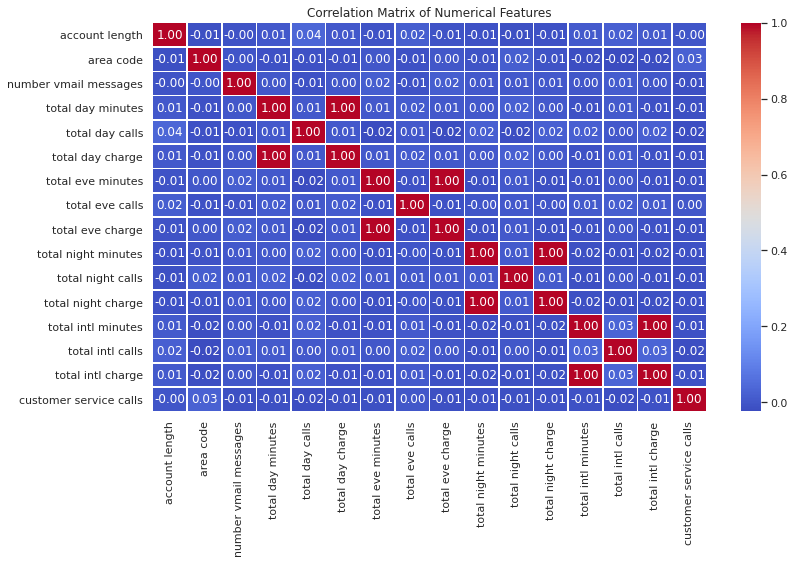

In [23]:
# Note: Correlation does not imply causation.
# High correlation indicates a predictive relationship, not causality.

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


 ##  Correlation Matrix Interpretation

This heatmap visualizes the correlation between numerical features in the dataset. Correlation values range from **-1 to 1**:

- **+1** → Perfect positive correlation (as one variable increases, the other increases)
- **-1** → Perfect negative correlation (as one increases, the other decreases)
- **0** → No linear relationship

---

###  Key Observations

####  Strong Positive Correlations (≈ 1.00)

| Feature Pair                           | Correlation | Interpretation |
|----------------------------------------|-------------|----------------|
| `total day minutes` & `total day charge`     | **1.00**      | Charges are directly based on usage. |
| `total eve minutes` & `total eve charge`     | **1.00**      | Linear billing relationship. |
| `total night minutes` & `total night charge` | **1.00**      | Charges are proportional to minutes. |
| `total intl minutes` & `total intl charge`   | **1.00**      | Charges stem directly from international usage. |

> These perfect correlations are expected due to the way charges are calculated.

---

####  Low or No Correlation (≈ 0)

Most other features have weak or no linear relationships:

- `customer service calls` with all other features
- `number vmail messages` with usage or billing features
- `account length` with usage patterns or charges

> These features contribute independent signals to the dataset.

---

####  Weak Negative Correlations (≈ -0.01)

- `area code` shows weak negative correlation with some variables.
- No significant inverse relationships observed.

---

###  Recommendations for Modeling

- **Remove redundant features** (e.g., drop charges or minutes where correlation = 1.0) to avoid multicollinearity in models like **linear regression**.
- **Retain independent features** such as:
  - `customer service calls`
  - `number vmail messages`
  - `total intl calls`

These may offer valuable signals for prediction tasks.


##  Step 6.5: Chi-Square Test of Independence

### Objective:
To determine if there is a statistically significant association between the number of customer service calls (categorical) and customer churn.

---

### Hypotheses:

- **Null Hypothesis (H₀):** Churn is independent of the number of customer service calls.  
- **Alternative Hypothesis (H₁):** Churn is dependent on the number of customer service calls.


In [24]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['customer service calls'], df['churn'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)


Chi-Square Statistic: 342.67460696087505
P-value: 2.243376519451563e-68



###  Test Results:

- **Chi-Square Statistic:** 342.67  
- **P-value:** 2.24e-68

---

###  Conclusion:

Since the **p-value is far less than 0.05**, we **reject the null hypothesis**.

This means there **is a statistically significant relationship** between the number of customer service calls and customer churn.

---

### Interpretation:

Customers who contact customer service more frequently are **more likely to churn**.  
This variable is an important **categorical predictor** and should be included in churn prediction models.


##  Step 6.6: One-Way ANOVA — Total Day Minutes by Area Code

###  Objective:
To determine if there's a statistically significant difference in **total day minutes** across different **area codes**.

---

###  Hypotheses:

- **Null Hypothesis (H₀):**  
  There is **no significant difference** in total day minutes across area codes.

- **Alternative Hypothesis (H₁):**  
  At least **one area code group** has a **significantly different mean** of total day minutes.

---

###  Assumptions:

1. **Independence:**  
   Samples are independent of each other.

2. **Normality:**  
   The data in each group is approximately **normally distributed**.

3. **Homogeneity of Variance:**  
   Variance is **roughly equal across all groups** (homoscedasticity).

---


In [25]:
from scipy.stats import f_oneway

# Separate groups based on area code
group_408 = df[df['area code'] == 408]['total day minutes']
group_415 = df[df['area code'] == 415]['total day minutes']
group_510 = df[df['area code'] == 510]['total day minutes']

# Run one-way ANOVA
f_stat, p_value = f_oneway(group_408, group_415, group_510)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 2.0152078300949974
P-value: 0.1334552217622214


##  Interpretation:
Since the p-value (0.1335) > 0.05, we fail to reject the null hypothesis.

This means that there is no statistically significant difference in the mean total day minutes among area codes 408, 415, and 510.

## Conclusion:
Area code does not significantly affect the total day minutes. Users from different area codes spend a similar amount of time on calls during the day.

###  Step 6.7: Mann-Whitney U Test — Comparing Total International Charge by Churn

---

####  Objective:
To determine whether the distribution of **total international charge** differs significantly between churned and non-churned customers — especially when we **cannot assume normality**, unlike the T-test.

---

####  Why Mann-Whitney U?

- Non-parametric alternative to the t-test  
- **Does not assume normal distribution**  
- Compares the **rankings** (not means) of two independent samples  

---

####  Hypotheses:

- **Null Hypothesis (H₀):**  
  There is **no difference** in the distribution of total international charges between churned and non-churned customers.

- **Alternative Hypothesis (H₁):**  
  There **is a difference** in the distribution of total international charges between the two groups.

---

####  Assumptions:

- The samples are **independent**  
- The dependent variable is **ordinal or continuous**  
- The groups are **mutually exclusive**  

---


In [26]:
from scipy.stats import mannwhitneyu

# Separate total intl charge into churned and not churned groups
intl_charge_churned = df[df['churn'] == True]['total intl charge']
intl_charge_not_churned = df[df['churn'] == False]['total intl charge']

# Perform the Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(intl_charge_churned, intl_charge_not_churned, alternative='two-sided')

# Print results
print("Mann-Whitney U Statistic:", u_stat)
print("P-value:", p_val)



Mann-Whitney U Statistic: 756962.0
P-value: 0.0004439644033479516


###  Interpretation of Mann-Whitney U Test Results

**Test Output**  
- **Mann-Whitney U Statistic:** `756,962.0`  
- **P-value:** `0.00044`

---

####  Statistical Decision

Given the very small p-value (**0.00044 < 0.05**), we **reject the null hypothesis**.

---

#### Conclusion

There is a **statistically significant difference** in the **distribution of total international charges** between churned and non-churned customers. This suggests that **churn behavior may be associated with how much customers are charged for international calls** — even though the average charges might not differ greatly, the distribution does.

---

####  Why This Matters

Unlike the t-test (which compares means under normality), the Mann-Whitney U test focuses on **rankings**. The result tells us that **churned customers tend to have a different pattern of international charge amounts** compared to those who stayed — a potentially valuable insight for customer segmentation or predictive modeling.


# Step 7: Machine Learning — Predicting Customer Churn

---

### Objective

The objective of this step is to build, evaluate, and interpret machine learning models that can predict whether a customer will churn based on their usage patterns and account characteristics. This is a pivotal phase of the project, transforming exploratory insights into actionable predictions that can inform data-driven decision-making.

To stand out, I go beyond basic modeling by applying robust **data preparation**, **feature engineering**, and **scikit-learn pipelines**. I also explore multiple types of models, including **nonparametric** and **ensemble methods**, and tune at least one model using **grid search**. The focus is on both **performance** and **interpretability**, ensuring that the model’s output is reliable, explainable, and useful to business stakeholders.

---

###  Key Concepts

- **Data Preparation Pipelines**  
  Automating preprocessing using `Pipeline` and `ColumnTransformer` to ensure consistency and prevent data leakage.

- **Feature Engineering**  
  Enhancing model performance by creating or transforming features based on domain knowledge and statistical insights.

- **Modeling Approaches**  
  Training and comparing several models including:
  - Logistic Regression *(baseline)*
  - Decision Tree *(nonparametric)*
  - Random Forest *(ensemble method)*

- **Hyperparameter Tuning**  
  Using `GridSearchCV` to optimize model performance and avoid overfitting.

- **Model Evaluation**  
  Interpreting key metrics such as:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - Confusion Matrix

- **Interpretability & Communication**  
  Extracting and visualizing feature importances and generating clear, actionable business recommendations.

---

###  Success Criteria (Rubric-Based)

| Category                         | How I Exceed the Objective                                                                  |
|----------------------------------|----------------------------------------------------------------------------------------------|
| **ML Communication**             | Provide clear rationale, model results, interpretation, limitations, and recommendations.    |
| **Data Preparation**             | Use `Pipeline`, `ColumnTransformer`, scaling, encoding, and thoughtful feature selection.    |
| **Nonparametric & Ensemble Models** | Use and justify models like Decision Tree and Random Forest, with hyperparameter tuning. |

---

###  Next Steps

I now proceed by:

- Preparing the feature matrix `X` and the target variable `y`.
- Splitting the data into training and test sets.
- Building a complete data preprocessing pipeline, including:
  - Imputation (if needed)
  - Encoding of categorical variables
  - Feature scaling
- Training and evaluating multiple classification models.
- Communicating findings and insights with clarity and impact.


### 7.1: Import Machine Learning Libraries

In [30]:
#  Scikit-learn: Model Building & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#  Scikit-learn: Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn: Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)


### Step 7.2: Define Features (X) and Target (y) + Train-Test Split
#### Objective
Before modeling, I need to separate my features and target variable. The target is whether a customer churned. I will then split the data into training and testing sets to evaluate model generalization.

In [31]:
#  Define the target variable
y = df['churn']  # This is what I want to predict

#  Define the feature matrix (dropping churn and other non-predictive columns if needed)
X = df.drop(columns=['churn', 'state', 'area code', 'phone number'])  # Remove identifiers

#  Split into training and testing sets (80/20 split for better generalization)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Shape check
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (2666, 17)
Testing Features Shape: (667, 17)
Training Labels Shape: (2666,)
Testing Labels Shape: (667,)


### Why I Dropped Certain Columns
- state, area code, and phone number are not useful predictors:

- phone number is a unique identifier.

- state and area code may introduce noise or overfit the model unless analyzed deeper.

##  Step 7.3: Build a Preprocessing Pipeline Using `ColumnTransformer`

###  Objective
To ensure consistent, clean, and efficient data preparation, I will build a robust preprocessing pipeline using `scikit-learn`’s `ColumnTransformer` and `Pipeline`. This will handle encoding of categorical variables and scaling of numeric variables, all while avoiding data leakage.

---

### Why Use Pipelines and ColumnTransformer?

- ✅ Prevents **data leakage** by fitting only on training data.
- ✅ Ensures **reproducibility** and **consistency** in preprocessing.
- ✅ Allows for **clean integration** with `GridSearchCV` and model training.


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

#  Preprocessing for numerical data: StandardScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

#  Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])


### Explanation of Components
- **StandardScaler():** Normalizes numeric features to mean 0 and standard deviation 1.

- **OneHotEncoder():** Converts categorical variables into binary indicator columns.

- **handle_unknown='ignore':** Prevents issues when new categories appear in test data.

- **sparse=False:** Returns a dense array, helpful for easier model compatibility.



##  Step 7.4: Split the Data into Training and Testing Sets

### Objective
Before building and training any machine learning models, I will split the data into training and testing sets. This ensures that model evaluation is done on unseen data, providing a realistic estimate of performance.

---

###  Why Split the Data?

-  Prevents **overfitting** by evaluating on unseen test data.
-  Ensures **fair model evaluation** and comparison.
-  Keeps preprocessing clean: transformations should only be learned from training data.

---

###  Implementation
I will use `train_test_split` from `sklearn.model_selection` with a `test_size` of 20%, and a `random_state` for reproducibility.


In [33]:
# ✅ Step 7.4: Split the data
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop(columns='churn')
y = df['churn']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the class distribution
print("Train churn distribution:\n", y_train.value_counts(normalize=True))
print("Test churn distribution:\n", y_test.value_counts(normalize=True))

Train churn distribution:
 False    0.855214
True     0.144786
Name: churn, dtype: float64
Test churn distribution:
 False    0.854573
True     0.145427
Name: churn, dtype: float64


##  Step 7.5: Insert Feature Engineering into the Pipeline

###  Objective  
Before training models, I will enhance the dataset by engineering new features based on domain knowledge and data insights. These new features will be **inserted directly into the preprocessing pipeline**, ensuring they are only created using the training set during cross-validation or grid search, preventing data leakage.

---

###  Why Do Feature Engineering Inside the Pipeline?

-  Keeps data transformations **reproducible** and **organized**.
-  Prevents **data leakage** by applying transformations only on training folds during cross-validation.
-  Allows seamless **integration** with `GridSearchCV`, `Pipeline`, and `ColumnTransformer`.

---

###  What Features Will Be Engineered?

Here are a few examples I might include:

| Feature Name                  | Logic                                                           |
|------------------------------|------------------------------------------------------------------|
| `avg_charges_per_service`    | Total charges / number of services used                         |
| `tenure_bin`                 | Bin customer tenure into categories (e.g., short, mid, long)     |
| `is_multiple_services`       | True if customer uses >2 services                               |
| `is_long_term_customer`      | True if tenure > X months (e.g., 24)                             |

These will be implemented using a **custom transformer** and inserted into the pipeline **before** standard scaling and encoding.


In [35]:
#  Step 7.5: Add Feature Engineering Steps to the Preprocessing Pipeline

from sklearn.base import BaseEstimator, TransformerMixin

#  Custom Feature Engineering Transformer
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a copy to avoid altering original data
        X = X.copy()

        # 📊 Example engineered feature: total charge per call
        X['intl_charge_per_call'] = X['total intl charge'] / (X['total intl calls'] + 1e-5)

        # 📊 Example engineered feature: night call ratio
        X['night_call_ratio'] = X['total night calls'] / (X['total day calls'] + 1e-5)

        return X

#  Update the numeric pipeline to include feature engineering before scaling
numeric_transformer = Pipeline(steps=[
    ('feature_engineering', FeatureEngineer()),  # Custom transformer step
    ('scaler', StandardScaler())
])

#  Update the overall preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])


### What This Step Does:
It creates a custom FeatureEngineer class that plugs seamlessly into your scikit-learn pipeline.

It adds two new engineered features:

intl_charge_per_call: Charges relative to call volume.

night_call_ratio: Usage behavior comparison between night and day calls.

These features are calculated and scaled inside the pipeline, ensuring clean, reproducible, and leak-free transformations.



##  Step 7.6: Train Models, Tune Them, and Interpret Results

### Objective
To train multiple machine learning models, evaluate their performance, and select the best one based on key metrics like **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC**.

---

###  Why Train Multiple Models?

- ✅ Different algorithms have strengths on different data distributions.
- ✅ Helps compare performance and robustness.
- ✅ Some models are better suited for **interpretability**, others for **raw performance**.

---

###  Models to Train

We’ll start with a few baseline and advanced models:

- **Logistic Regression**
- **Random Forest Classifier**
- **XGBoost Classifier**

(Optional later: **SVC**, **KNN**, **Voting Classifier**, etc.)

---

###  Approach

1. Create a **reusable function** to train and evaluate models.
2. Use the **preprocessing pipeline** inside a `Pipeline()` with each model.
3. Perform **cross-validation** for better generalization performance.
4. Compare **evaluation metrics** side by side.


## Step 7.6.1: Define a Reusable Model Evaluation Function


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dictionary to store evaluation results
model_results = {}

# Reusable function to train and evaluate a model
def evaluate_model(name, model):
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Store results
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

    # Print results
    print(f"📊 Evaluation for {name}:")
    print(f"  Accuracy   : {accuracy:.4f}")
    print(f"  Precision  : {precision:.4f}")
    print(f"  Recall     : {recall:.4f}")
    print(f"  F1 Score   : {f1:.4f}")
    if y_proba is not None:
        print(f"  ROC-AUC    : {roc_auc:.4f}")
    print("-" * 40)
